
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you for the updates! You can find my new comments with digit 2. You did a great job here! You learned how to build and evaluate models to predict used car prices. You have successfully conducted EDA, handled missing values and outliers. You trained and tuned several models, compared their RMSE and speed, and chose the best model for the final testing. You learned how to prepare and encode large data and how to weigh training speed vs. prediction error, and why this matters in real-world applications. I hope you enjoyed this project! I do not have any questions, so the project can be accepted. Good luck! 

    
</div>

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi Chris! Congratulations on submitting another project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    

   
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully prepared the subsets. It is important to split the data correctly in order to ensure there's no intersection;    
    

    
- Excluded some irrelevant columns to reduce computational cost;
    
    
- Encoded cetegorical columns;    

       
    
    
- Trained and compared several models, great!

    

- Analyzed metrics. It is not enough to just fit the model and print the result. Instead, we have to analyze the results as it helps us identify what can be improved;

    
    
- Wrote an excellent conclusion that shows how the project met its objectives, great! 

</div>
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project. I've left several recommendations throughout the project. Please take a look.
 
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. For instance,


- Please try to explore the distributions and add conclusions. In real-world problems, the data is rarely clean. Displaying distributions help us evaluate the data, find outliers, identify the required preprocessing steps and understand feature relationships, which informs feature engineering. Feature engineering in some cases is a clue; 

    
    
- Check the data for the duplicates after you drop columns; 
    

      
- Please don't use the test subset until the final test for the reason I stated in one of my comments;

    
    
- In the very end of the project, choose the best model (the one that yielded the best RMSE or 2 if they have the same metric values) and run the final test;



There may be other issues that need your attention. I described everything in my comments.  
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> great job here! You demonstrated strong analytical and modeling skills by preparing the data, experimenting with multiple advanced models, and evaluating them with appropriate metrics. The conclusion clearly communicates which model offers the best trade-off between speed and RMSE. There are just several issues that need your attention. Please take a look at my comments and do not hesitate to ask questions if some of them seem unclear. I will wait the project for the second review 😊 
    

<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr> 
    
✍️ Here's a link to [Supervised Learning documenation sections](https://scikit-learn.org/stable/supervised_learning.html) that you may find useful.
    
<hr>
    
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs Feel free to book 1-1 session [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions in the sprint channels on Discord if you need assistance 😉 
</div>

# Introduction
---
In this project we'll be working on developing a machine learning model for <em>Rusty Bargain Car Sales</em>. We will develop a few different models to compare the following:
- quality of predictions
- speed of predictions
- time required for training

We will score our models according to RMSE. Gradient Boosting will be the area of focus here. In this project we'll utilize these three gradient boosting frameworks:
- XGBoost
- CatBoost
- LightGBM

We'll explore the differences along with their strength and weaknesses. After running each test we'll choose which model best fit our requirements.

The dataset we'll be using can be found at <a href='https://practicum-content.s3.us-west-1.amazonaws.com/datasets/car_data.csv'>https://practicum-content.s3.us-west-1.amazonaws.com/datasets/car_data.csv</a>.

Project stages:
1. Data Preparation
2. Model Creation/Testing
3. Model Analyses
4. Conclusion

## Data Preparation
---

In [25]:
pip install flaml

Note: you may need to restart the kernel to use updated packages.


In [26]:
# Importing dependencies
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor, Pool
import xgboost as xgb
import lightgbm  as lgb
from flaml.default import LGBMRegressor

In [27]:
# Loading dataset with preview
df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/car_data.csv')
df.head(3)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [29]:
df.shape

(354369, 16)

After a quick bird's eye view on the data the following will have to be done:
- drop any duplicates
- columns have to be renames to standard form
- drop `DateCrawled`, `PostalCode`, `RegistraitonYear`, `RegistrationMonth`, `NumberOfPictures`, `LastSeen`, & `DateCreated`
- Create a `dom` column showing the length of time the vehicle has been listed for sale
- missing values have to be addressed

In [30]:
df[df['DateCrawled'] == '31/03/2016 23:58']
# print(df['RegistrationYear'].max())

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
59100,31/03/2016 23:58,8500,coupe,1988,auto,132,other,50000,4,petrol,mercedes_benz,no,31/03/2016 00:00,0,70437,01/04/2016 07:44
78345,31/03/2016 23:58,0,NaN,2018,NaN,0,c2,150000,0,NaN,citroen,NaN,31/03/2016 00:00,0,49610,07/04/2016 04:16
102507,31/03/2016 23:58,120,small,1999,manual,54,other,150000,0,petrol,skoda,NaN,31/03/2016 00:00,0,84529,07/04/2016 04:16
123376,31/03/2016 23:58,4800,bus,2003,manual,101,touran,125000,12,gasoline,volkswagen,yes,31/03/2016 00:00,0,72172,01/04/2016 07:44
201546,31/03/2016 23:58,3399,bus,2001,manual,0,alhambra,150000,11,gasoline,seat,yes,31/03/2016 00:00,0,97424,07/04/2016 04:16
345137,31/03/2016 23:58,1199,small,2001,manual,75,lupo,150000,11,petrol,volkswagen,yes,31/03/2016 00:00,0,91177,07/04/2016 04:16


In [31]:
# Removing duplicates
df = df.drop_duplicates()
df.duplicated().sum()

0

In [32]:
df = df.drop(['DateCrawled','PostalCode','RegistrationYear','RegistrationMonth','NumberOfPictures'], axis=1)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good.     
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
`DateCreated`, however, can be used to calculate the publication period. The longer an active advertisement remains published, the less likely the car is being sold, likely due to an overpriced offer.


    
</div>

In [33]:
# Changing columns names
df = df.rename(columns={
    'Price':'price',
    'VehicleType':'vehicle_type',
    'Gearbox':'gearbox',
    'Power':'power',
    'Model':'model',
    'Mileage':'mileage',
    'FuelType':'fuel_type',
    'Brand':'make',
    'NotRepaired':'not_repaired',
    'DateCreated':'date_created',
    'LastSeen':'last_seen'
})

In [34]:
df['make_model'] = df['make'].str.cat(df['model'],sep="_")
df = df.drop(['make','model'],axis=1)
df.columns

Index(['price', 'vehicle_type', 'gearbox', 'power', 'mileage', 'fuel_type',
       'not_repaired', 'date_created', 'last_seen', 'make_model'],
      dtype='object')

In [35]:
date_cols = ['date_created','last_seen']
for col in date_cols:
    df[col] = pd.to_datetime(df[col],dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354107 entries, 0 to 354368
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   price         354107 non-null  int64         
 1   vehicle_type  316623 non-null  object        
 2   gearbox       334277 non-null  object        
 3   power         354107 non-null  int64         
 4   mileage       354107 non-null  int64         
 5   fuel_type     321218 non-null  object        
 6   not_repaired  282962 non-null  object        
 7   date_created  354107 non-null  datetime64[ns]
 8   last_seen     354107 non-null  datetime64[ns]
 9   make_model    334406 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 29.7+ MB


In [36]:
df['last_seen'].describe()

count                           354107
mean     2016-03-29 23:51:12.374903808
min                2016-03-05 14:15:00
25%                2016-03-23 02:50:00
50%                2016-04-03 15:15:00
75%                2016-04-06 10:06:00
max                2016-04-07 14:58:00
Name: last_seen, dtype: object

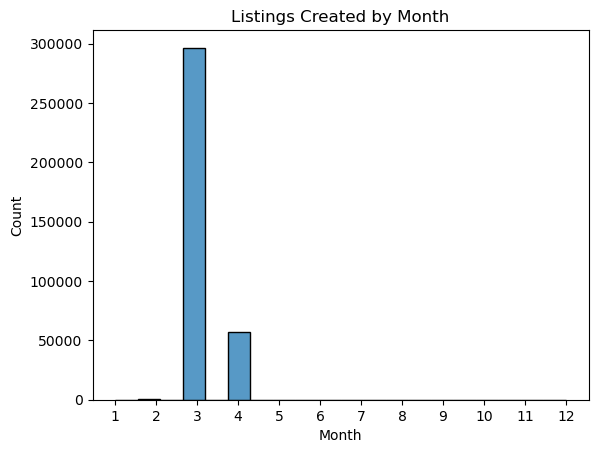

In [37]:
sns.histplot(df['date_created'].dt.month)
plt.title('Listings Created by Month')
plt.xlabel('Month')
plt.xticks(np.arange(1,13,1))
plt.show()

The month there were the most listings created has been March and April. We've got a decent measure of supply but we're missing data that tracks demand. A field that track views for each observation would give valuable insights on the market and service.

In [38]:
df['date_created'].describe()

count                           354107
mean     2016-03-20 19:11:13.738728960
min                2014-03-10 00:00:00
25%                2016-03-13 00:00:00
50%                2016-03-21 00:00:00
75%                2016-03-29 00:00:00
max                2016-04-07 00:00:00
Name: date_created, dtype: object

The oldest data here is from year 2014. The current date on this dataset is 04-07-2016. We will need to keep the most recent 3 month data in order to capture recent trends.

In [39]:
# Filtereing out data older than 3 months
df = df[(df['date_created'].dt.month >= 1)&(df['date_created'].dt.year == 2016)&(df['date_created'].dt.day >= 7)]
df['date_created'].describe()

count                           282770
mean     2016-03-19 00:51:03.736606208
min                2016-01-07 00:00:00
25%                2016-03-12 00:00:00
50%                2016-03-19 00:00:00
75%                2016-03-25 00:00:00
max                2016-04-07 00:00:00
Name: date_created, dtype: object

Now that we've extracted the relevant data, we can now create new features for each datetime column that will have month and day respectively for each feature for our models to process. We'll then drop the datetime columns and keep the month and day features. 

We'll feature engineer a new column that'll show days on market `dom`. This will reflect how long these listing. have been for sale.

In [40]:
# Creating `DOM` column
df['dom'] = df['last_seen'] - df['date_created']
df = df.drop(['last_seen','date_created'],axis=1)
df.head(3)

,price,vehicle_type,gearbox,power,mileage,fuel_type,not_repaired,make_model,dom
0,480,NaN,manual,0,150000,petrol,NaN,volkswagen_golf,14 days 03:16:00
1,18300,coupe,manual,190,125000,gasoline,yes,NaN,14 days 01:46:00
2,9800,suv,auto,163,125000,gasoline,NaN,jeep_grand,22 days 12:47:00


In [41]:
df.isna().sum()/df.shape[0]

price           0.000000
vehicle_type    0.106868
gearbox         0.056862
power           0.000000
mileage         0.000000
fuel_type       0.093861
not_repaired    0.202164
make_model      0.055936
dom             0.000000
dtype: float64

We have about 5.5% of the data with missing make_model values. These observations will not help us with our model training. We'll remove these obervations.

In [42]:
# Dropping observations with missing make/model values
df = df.dropna(subset=['make_model'],axis=0)
df['make_model'].isna().sum()

0

In [43]:
# Checking mileage column
df['mileage'].describe()

count    266953.000000
mean     128628.204216
std       37194.960235
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: mileage, dtype: float64

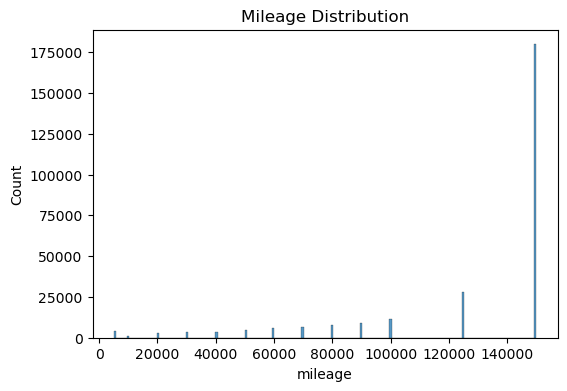

In [44]:
plt.figure(figsize=(6,4))
sns.histplot(df['mileage'])
plt.title('Mileage Distribution')
plt.show()

In [45]:
# Checking `price` column description
df['price'].describe()

count    266953.000000
mean       4466.999389
std        4513.228166
min           0.000000
25%        1100.000000
50%        2800.000000
75%        6499.000000
max       20000.000000
Name: price, dtype: float64

Number of outliers:  13469


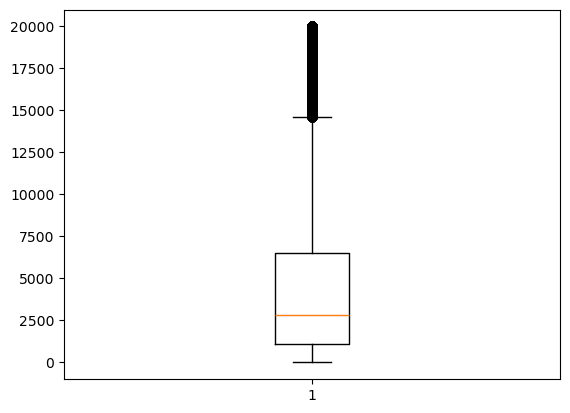

In [48]:
boxplot = plt.boxplot(df['price'].values)
outliers = list(boxplot['fliers'][0].get_data()[1])
df_outliers = df[df['price'].isin(outliers)]
print('Number of outliers: ',len(outliers))

In [49]:
df['power'].describe()

count    266953.000000
mean        111.140002
std         187.548125
min           0.000000
25%          70.000000
50%         105.000000
75%         143.000000
max       20000.000000
Name: power, dtype: float64

In [50]:
df['dom'] = df['dom'].dt.days
df['dom'].describe()

count    266953.000000
mean          9.648418
std           8.366492
min           0.000000
25%           2.000000
50%           8.000000
75%          15.000000
max          91.000000
Name: dom, dtype: float64

Outliers detected in `mileage`, `power`, `dom` and `price` columns. We'll remove any observations 3 standard deviations above & below the mean.

In [51]:
outliers = ['price','mileage','power','dom']
# Filtering out the outliers
df = df[(np.abs(st.zscore(df[outliers]) < 3).all(axis=1))]
df.head()

,price,vehicle_type,gearbox,power,mileage,fuel_type,not_repaired,make_model,dom
0,480,NaN,manual,0,150000,petrol,NaN,volkswagen_golf,14
2,9800,suv,auto,163,125000,gasoline,NaN,jeep_grand,22
3,1500,small,manual,75,150000,petrol,no,volkswagen_golf,0
4,3600,small,manual,69,90000,gasoline,no,skoda_fabia,6
7,0,sedan,manual,50,40000,petrol,no,volkswagen_other,4


In [52]:
df.describe()

,price,power,mileage,dom
count,262848.000000,262848.000000,262848.000000,262848.000000
mean,4263.262559,106.656357,129229.802015,9.566407
std,4196.304756,61.687015,36689.562405,8.269516
min,0.000000,0.000000,5000.000000,0.000000
25%,1100.000000,69.000000,125000.000000,2.000000
50%,2700.000000,105.000000,150000.000000,8.000000
75%,6200.000000,140.000000,150000.000000,15.000000
max,18000.000000,671.000000,150000.000000,34.000000


<Axes: xlabel='dom'>

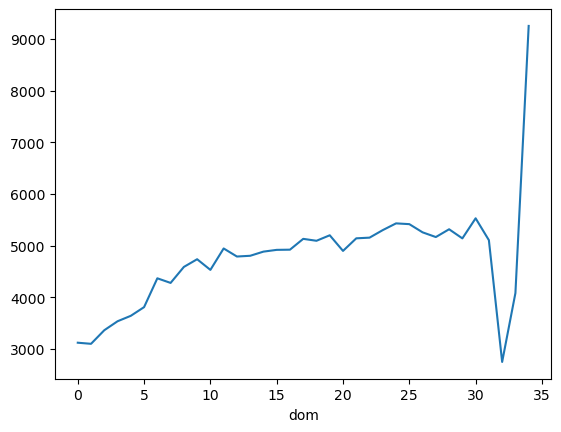

In [53]:
df.groupby('dom')['price'].mean().plot()

Here we see as the longer the listing is on the market indicates a higher price. The lower the price, the more buyers on the market. Higher price thins out the available buyers on the market at those given prices. Could also be possible the vehicle is overpriced.

In [54]:
# Checking vehicle type values
df['vehicle_type'].value_counts(dropna=False)

vehicle_type
sedan          69289
small          60855
wagon          49533
NaN            24563
bus            21803
convertible    14310
coupe          11693
suv             8542
other           2260
Name: count, dtype: int64

We have about 24 thousand missing `vehicle_type` values. We'll just rename these values as 'unknown' 

In [55]:
# Replacing missing values with 'unknown' value
df['vehicle_type'] = df['vehicle_type'].fillna('unknown')
df['vehicle_type'].value_counts()

vehicle_type
sedan          69289
small          60855
wagon          49533
unknown        24563
bus            21803
convertible    14310
coupe          11693
suv             8542
other           2260
Name: count, dtype: int64

In [56]:
# Checking `gearbox` values
df['gearbox'].value_counts(dropna=False)

gearbox
manual    201791
auto       48380
NaN        12677
Name: count, dtype: int64

We have no way to determine the true values of these missing values. We can still use this data so we can just fill these in with 'unknown' values.

In [57]:
# Filling missing `gearbox` values with 'unknown'
df['gearbox'] = df['gearbox'].fillna('unknown')
df['gearbox'].value_counts()

gearbox
manual     201791
auto        48380
unknown     12677
Name: count, dtype: int64

In [58]:
# Checking `fuel_type` values
df['fuel_type'].value_counts(dropna=False)

fuel_type
petrol      162962
gasoline     74546
NaN          20605
lpg           3970
cng            449
hybrid         155
other          108
electric        53
Name: count, dtype: int64

We've no clue on how to determine the true values of the missing instances. We'll again fill these with 'unknown' string values. We will also combine pretrol and gasoline fuel types. We'll also combine the three lowest count values as 'other'. We're going to take those 'other's and remove them.

In [59]:
df['fuel_type'] = df['fuel_type'].fillna('unknown')
df['fuel_type'] = df['fuel_type'].replace({'hybrid' : 'other', 'electric' : 'other', 'petrol' : 'gasoline','cng':'other'})
df = df[df['fuel_type'] != 'other']
df['fuel_type'].value_counts()

fuel_type
gasoline    237508
unknown      20605
lpg           3970
Name: count, dtype: int64

In [60]:
# Checking `not_repaired` values
df['not_repaired'].value_counts(dropna=False)

not_repaired
no     185706
NaN     49466
yes     26911
Name: count, dtype: int64

In [61]:
# Filling missing values with 'unknown' string values
df['not_repaired'] = df['not_repaired'].fillna('unknown')
df['not_repaired'].value_counts()

not_repaired
no         185706
unknown     49466
yes         26911
Name: count, dtype: int64

In [62]:
df.isna().sum()/df.shape[0]

price           0.0
vehicle_type    0.0
gearbox         0.0
power           0.0
mileage         0.0
fuel_type       0.0
not_repaired    0.0
make_model      0.0
dom             0.0
dtype: float64

No reason to keep this coulumn as there are only zeros. The model will not have any data to learn from this feature so will only contribute to longer, unnecessary, training time.

Let's check for any duplicates after consolidating same categorical types with different names.

In [63]:
# Final chekc for dupliacates
print('Number of duplicates: ', df.duplicated().sum())
df = df.drop_duplicates()
df.duplicated().sum()

Number of duplicates:  14071


0

In [64]:
df.shape

(248012, 9)

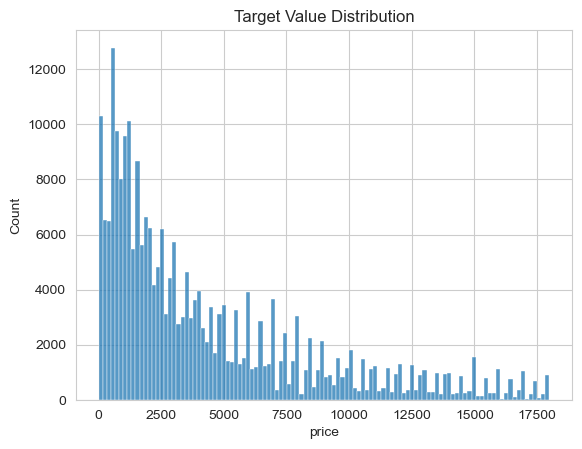

In [65]:
# Checking target value distribution
sns.set_style('whitegrid')
sns.histplot(df['price'])
plt.title('Target Value Distribution')
plt.show()

The distribution on price is still heavily skewed to the right after eliminating outliers. This is realistic as there are many  more people who own lesser priced cars than the higher priced, luxury vehicles.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Great job!     
</div><div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
- Are there any outliers in the data?  Please call the `describe` method and display charts. Drop abnormal values if they exist. Hint: `price` and `power` columns definitely have outliers.
    


- There are columns that should be deleted to reduce computational cost. These are:  `LastSeen`, `DateCreated`, `RegistrationYear`, `RegistrationMonth`, `PostalCode` and `NumberOfPictures`. 
    
    
    
- After removing unnecessary columns, it makes sense to check the data for duplicates again, as the dataset will later be splitted into training and test sets. Removing specific columns can cause previously distinct rows to become identical. If a dropped column contained unique values (ID or timestamp), removing it may make multiple rows appear the same.   
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
    
- Consider analyzing categories as well. Petrol and gasoline refer to the same fuel, so we can use one of these categories. There are some other rare fuel types that can be dropped. If a category appears only in the training or validation subset, for instance, and we use `handle_unknown='ignore'`, the linear model might miss important signals in validation or make predictions with incomplete features thus breaking the assumptions of linearity. It may be helpful to make sure that training and validation subsets use the same feature columns after encoding. 



    
- Consider comparing max dates in the `RegistrationYear` and  `DateCrawled` columns. Vehicle should not be registered after the data was downloaded :)  </div>

## Model Creation/Testing
---

We'll start with a dummy model simulating a model predicting the average target value for each prediction. We'll compare that with a standard linear regression model.

First we'll prepare the features before we create features and target variables.

In [68]:
# Creating feature and target sets
X = df.drop('price',axis=1)
y = df['price']

# Creating training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

# Creating Validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=12345)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(148806, 8)
(49603, 8)
(49603, 8)
(148806,)
(49603,)
(49603,)


In [69]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148806 entries, 195910 to 141099
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   vehicle_type  148806 non-null  object
 1   gearbox       148806 non-null  object
 2   power         148806 non-null  int64 
 3   mileage       148806 non-null  int64 
 4   fuel_type     148806 non-null  object
 5   not_repaired  148806 non-null  object
 6   make_model    148806 non-null  object
 7   dom           148806 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 10.2+ MB


In [70]:
# Creating list of categorical columns for future calls
cat_cols = ['vehicle_type','gearbox','fuel_type','not_repaired','make_model']

# Converting category columns to category type values
for col in cat_cols:
    X_train[col] = X_train[col].astype('category')
    X_valid[col] = X_valid[col].astype('category')
    X_test[col] = X_test[col].astype('category')
print(X_train[cat_cols].dtypes)
print(X_test[cat_cols].dtypes)

# Initializing OneHotEncoder to encode categorical features
encoder = OrdinalEncoder(dtype= 'int64',handle_unknown='use_encoded_value',unknown_value=-1)
encoder.fit(X_train[cat_cols]) 

vehicle_type    category
gearbox         category
fuel_type       category
not_repaired    category
make_model      category
dtype: object
vehicle_type    category
gearbox         category
fuel_type       category
not_repaired    category
make_model      category
dtype: object


OrdinalEncoder(dtype='int64', handle_unknown='use_encoded_value',
               unknown_value=-1)

In [71]:
# Encoding sets

X_train[cat_cols] = encoder.transform(X_train[cat_cols])
X_valid[cat_cols] = encoder.transform(X_valid[cat_cols])
X_test[cat_cols] = encoder.transform(X_test[cat_cols])

print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(148806, 8)
(49603, 8)
(49603, 8)
(148806,)
(49603,)
(49603,)


In [72]:
# Verifying changes
X_train.head()

,vehicle_type,gearbox,power,mileage,fuel_type,not_repaired,make_model,dom
195910,7,2,0,5000,0,1,236,11
95104,5,1,60,150000,0,0,197,22
7051,4,0,177,150000,0,0,147,12
322320,8,1,140,150000,0,0,270,21
324122,4,1,75,150000,0,0,81,0


In [73]:
# Creating dummy model with RSME score
dummy_df = pd.Series(y_train.mean(),index=y_train)
print('Dummy RSME: ',np.sqrt(mean_squared_error(y_train,dummy_df)))

Dummy RSME:  4210.655609836049


In [74]:
# Defining the numerical data for scaling
numeric = ['power', 'mileage']

# Initializing scaler
scaler = StandardScaler()
X_train[numeric] = scaler.fit_transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])
X_train[numeric].head(3)


,power,mileage
195910,-1.737042,-3.367561
95104,-0.763836,0.569961
7051,1.133916,0.569961


In [82]:
# Initializing and training Linear regression model
lr = LinearRegression()

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
For Linear Regression, it's better to use some other encoder as I mentione above, since this model may incorrectly interpret the data.     
</div>

In [83]:
%%time
lr.fit(X_train,y_train)

CPU times: user 20.8 ms, sys: 7.76 ms, total: 28.6 ms
Wall time: 20.6 ms


LinearRegression()

In [84]:
%%time
pred = lr.predict(X_valid)

CPU times: user 2.49 ms, sys: 7.68 ms, total: 10.2 ms
Wall time: 4.54 ms



<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
Please make sure you save at least one subset for the final testing. In the cell above, you split the data into 2 subsets. If one of the subsets must be saved for the final test and must not be touched, RMSE must be evaluated on the same subset you use for training. Or you can split the data into 3 subsets, not 2. 
    



</div>

In [85]:
print('Linear regression RSME: ',np.sqrt(mean_squared_error(y_valid,pred)))

Linear regression RSME:  3253.6480500801267


Not a great score considering the mean error is more than the average target value. Let's utilize some gradient boosting tools to sharpen up our predictions with the help of GridSearchCV for hypertuning.

In [86]:
# Creating dictionary with hyperparameter arguments for tuning
params = {
    'min_samples_split' : [2,10],
    'min_samples_leaf' : [1,50]
}

forest = RandomForestRegressor(random_state=12345)

forest_cv = GridSearchCV(
    estimator = forest,
    param_grid = params,
    scoring = 'neg_root_mean_squared_error',
    verbose = 3,
    n_jobs = 5
)

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
You have successfully implemented hyperparameters tuning, well done!     
</div>

In [87]:
%%time
forest_cv.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
CPU times: user 23.7 s, sys: 275 ms, total: 24 s
Wall time: 7min 42s


GridSearchCV(estimator=RandomForestRegressor(random_state=12345), n_jobs=5,
             param_grid={'min_samples_leaf': [1, 50],
                         'min_samples_split': [2, 10]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [88]:
%%time
pred = forest_cv.predict(X_valid)


CPU times: user 984 ms, sys: 364 µs, total: 984 ms
Wall time: 990 ms


In [89]:
print("Random Forest RMSE: ",np.sqrt(mean_squared_error(y_valid,pred)))

Random Forest RMSE:  2305.4677103832323
[CV 2/5] END ........min_samples_leaf=1, min_samples_split=2; total time= 1.4min
[CV 2/5] END .......min_samples_leaf=1, min_samples_split=10; total time= 2.0min
[CV 4/5] END .......min_samples_leaf=1, min_samples_split=10; total time= 1.9min
[CV 1/5] END ......min_samples_leaf=50, min_samples_split=10; total time= 1.5min
[CV 4/5] END ........min_samples_leaf=1, min_samples_split=2; total time= 2.4min
[CV 2/5] END .......min_samples_leaf=50, min_samples_split=2; total time= 1.5min
[CV 5/5] END .......min_samples_leaf=50, min_samples_split=2; total time= 1.6min
[CV 5/5] END ........min_samples_leaf=1, min_samples_split=2; total time= 2.5min
[CV 3/5] END .......min_samples_leaf=50, min_samples_split=2; total time= 1.4min
[CV 2/5] END ......min_samples_leaf=50, min_samples_split=10; total time= 1.5min
[CV 3/5] END ........min_samples_leaf=1, min_samples_split=2; total time= 1.4min
[CV 3/5] END .......min_samples_leaf=1, min_samples_split=10; total t

The random forest regression model performed better than the linear regression model by a little less than 30%. Took a while to train, and  RSME score is not great considering the target average is close to the RSME score. 

I'm sure the boosting frameworks we're going to utilize next will perform better.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Nice result! 

</div>

### XGBoost
XGBoost will be the first gradient boosting model we'll utilize. This model utilizes decision tree ensembles to make its predictions. XGBoost does well with very big complicated datasets. This model does require one-hot encoding in order to process categorical features. 

We've already encoded and scaled our features for the linear regressioni and random forest models. We'll run our XGBoost model through a gridsearch wrapper for hypertuning.

In [90]:
# Initializing XGBoost model with hyperparameters
xboost = xgb.XGBRegressor(
    learning_rate=0.4,
    reg_alpha=0.5,
    eval_metric='rmse',
    seed=12345
)

In [91]:
%%time
xboost.fit(X_train,y_train)

CPU times: user 15.8 s, sys: 26.1 ms, total: 15.8 s
Wall time: 15.8 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.4, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=12345,
             reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1, seed=12345,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [92]:
%%time
xgb_pred = xboost.predict(X_valid)

CPU times: user 141 ms, sys: 0 ns, total: 141 ms
Wall time: 88.2 ms


In [93]:
xboost_rsme = np.sqrt(mean_squared_error(y_valid,xgb_pred))
print('XGBoost Test RSME: ',xboost_rsme)

XGBoost Test RSME:  2239.8354886364314


This is a little better. We were able to get the score a bit lower than the random forest regression RMSE score, which is a good sign. Surely the RMSE score of this xgboost model has much room for improvement. 

We'll move on to the catboost framework.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Very good! 

</div>

### CATBoost
Next we'll be utilizing the catboost gradient boosting tool created by Yandex. This model works well with datasets with many categorical features. It also does particularly well with smaller sized sample sets. This model does not require one-hot encoding or any kind of encoding when preprocessing the dataset's features. This can make it convenient and make for quicker training times, as there are less features to process.

The dataset we're using for this project has over 300k obseravtions. 

Let's see how this model stacks up against our XGBoost model.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Let's not split and scale the data again :) </div>

In [94]:
# Checking feature types
X_train.dtypes

vehicle_type      int64
gearbox           int64
power           float64
mileage         float64
fuel_type         int64
not_repaired      int64
make_model        int64
dom               int64
dtype: object

In [112]:
# Changing categorical features to categry dtype
for col in cat_cols:
    X_train[col] = X_train[col].astype('category')
    X_valid[col] = X_valid[col].astype('category')
    X_test[col] = X_test[col].astype('category')

/tmp/ipykernel_300/3161659985.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[col] = X_test[col].astype('category')


In [123]:
# Creating pool for data processing
train_pool = Pool(
    label = y_train,
    cat_features = cat_cols,
    data = X_train
)
valid_pool = Pool(
    cat_features = cat_cols,
    data = X_valid
)
test_pool = Pool(
    cat_features = cat_cols,
    data = X_test
)

In [124]:
# Initializing catboost regressor
cb = CatBoostRegressor(
    random_state=12345, 
    learning_rate= 0.2, 
    l2_leaf_reg = 0.8)

In [125]:
%%time
cb.fit(train_pool)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
0:	learn: 3842.1448839	total: 158ms	remaining: 2m 37s
1:	learn: 3563.8640740	total: 315ms	remaining: 2m 37s
2:	learn: 3365.7787810	total: 446ms	remaining: 2m 28s
3:	learn: 3188.2605782	total: 562ms	remaining: 2m 20s
4:	learn: 3060.1694100	total: 665ms	remaining: 2m 12s
5:	learn: 2969.4841537	total: 783ms	remaining: 2m 9s
6:	learn: 2899.1663872	total: 887ms	remaining: 2m 5s
7:	learn: 2842.9577051	total: 996ms	remaining: 2m 3s
8:	learn: 2799.8394811	total: 1.11s	remaining: 2m 2s
9:	learn: 2766.4997196	total: 1.24s	remaining: 2m 2s
10:	learn: 2742.8076338	total: 1.33s	remaining: 1m 59s
11:	learn: 2723.6815546	total: 1.45s	remaining: 1m 59s
12:	learn: 2709.9863285	total: 1.53s	remaining: 1m 56s
13:	learn: 2690.2763744	total: 1.62s	remaining: 1m 54s
14:	learn: 2674.1800284	total: 1.77s	remaining: 1m 56s
15:	learn: 2659.8682153	total: 1.88s	remaining: 1m 55s
16:	learn: 2648.7863272	total: 1.99s	remaining: 1m 54s
17:	learn: 2639.

149:	learn: 2324.6775345	total: 17.5s	remaining: 1m 38s
150:	learn: 2323.8742820	total: 17.6s	remaining: 1m 38s
151:	learn: 2322.6458792	total: 17.7s	remaining: 1m 38s
152:	learn: 2321.4312419	total: 17.8s	remaining: 1m 38s
153:	learn: 2320.7652949	total: 17.9s	remaining: 1m 38s
154:	learn: 2320.2267609	total: 18s	remaining: 1m 38s
155:	learn: 2319.4453472	total: 18.1s	remaining: 1m 37s
156:	learn: 2318.2384580	total: 18.2s	remaining: 1m 37s
157:	learn: 2318.0400640	total: 18.4s	remaining: 1m 37s
158:	learn: 2317.7188109	total: 18.5s	remaining: 1m 37s
159:	learn: 2317.5140264	total: 18.6s	remaining: 1m 37s
160:	learn: 2316.7286405	total: 18.7s	remaining: 1m 37s
161:	learn: 2315.3192154	total: 18.9s	remaining: 1m 37s
162:	learn: 2314.6666441	total: 19s	remaining: 1m 37s
163:	learn: 2313.9992669	total: 19.1s	remaining: 1m 37s
164:	learn: 2313.2338850	total: 19.2s	remaining: 1m 37s
165:	learn: 2312.8120364	total: 19.3s	remaining: 1m 37s
166:	learn: 2312.1658175	total: 19.5s	remaining: 1m 

296:	learn: 2234.3826658	total: 35s	remaining: 1m 22s
297:	learn: 2234.1414450	total: 35.1s	remaining: 1m 22s
298:	learn: 2233.9061097	total: 35.2s	remaining: 1m 22s
299:	learn: 2233.6281870	total: 35.3s	remaining: 1m 22s
300:	learn: 2233.1955451	total: 35.5s	remaining: 1m 22s
301:	learn: 2232.8172397	total: 35.5s	remaining: 1m 22s
302:	learn: 2232.5362404	total: 35.7s	remaining: 1m 22s
303:	learn: 2232.0819127	total: 35.8s	remaining: 1m 21s
304:	learn: 2231.9312384	total: 35.9s	remaining: 1m 21s
305:	learn: 2230.8983175	total: 36s	remaining: 1m 21s
306:	learn: 2230.6470863	total: 36.1s	remaining: 1m 21s
307:	learn: 2230.3916266	total: 36.3s	remaining: 1m 21s
308:	learn: 2229.9785214	total: 36.4s	remaining: 1m 21s
309:	learn: 2229.6878237	total: 36.5s	remaining: 1m 21s
310:	learn: 2229.2560700	total: 36.6s	remaining: 1m 21s
311:	learn: 2228.8175043	total: 36.7s	remaining: 1m 20s
312:	learn: 2228.5560186	total: 36.8s	remaining: 1m 20s
313:	learn: 2228.2401126	total: 36.9s	remaining: 1m 

445:	learn: 2181.7653590	total: 53.3s	remaining: 1m 6s
446:	learn: 2181.5415141	total: 53.4s	remaining: 1m 6s
447:	learn: 2181.4808443	total: 53.5s	remaining: 1m 5s
448:	learn: 2181.2300319	total: 53.6s	remaining: 1m 5s
449:	learn: 2180.8987237	total: 53.8s	remaining: 1m 5s
450:	learn: 2180.7425956	total: 53.9s	remaining: 1m 5s
451:	learn: 2179.9668575	total: 54s	remaining: 1m 5s
452:	learn: 2179.6752673	total: 54.2s	remaining: 1m 5s
453:	learn: 2179.2872614	total: 54.3s	remaining: 1m 5s
454:	learn: 2178.9337255	total: 54.5s	remaining: 1m 5s
455:	learn: 2178.7170407	total: 54.5s	remaining: 1m 5s
456:	learn: 2178.4138282	total: 54.7s	remaining: 1m 4s
457:	learn: 2178.1979390	total: 54.8s	remaining: 1m 4s
458:	learn: 2177.9698805	total: 54.9s	remaining: 1m 4s
459:	learn: 2177.4840991	total: 55s	remaining: 1m 4s
460:	learn: 2177.0766547	total: 55.1s	remaining: 1m 4s
461:	learn: 2176.5589501	total: 55.3s	remaining: 1m 4s
462:	learn: 2175.8463343	total: 55.4s	remaining: 1m 4s
463:	learn: 21

596:	learn: 2143.4715513	total: 1m 11s	remaining: 47.9s
597:	learn: 2143.2668706	total: 1m 11s	remaining: 47.8s
598:	learn: 2143.0921073	total: 1m 11s	remaining: 47.7s
599:	learn: 2142.5495019	total: 1m 11s	remaining: 47.6s
600:	learn: 2142.4510426	total: 1m 11s	remaining: 47.5s
601:	learn: 2142.2718595	total: 1m 11s	remaining: 47.3s
602:	learn: 2141.9171798	total: 1m 11s	remaining: 47.2s
603:	learn: 2141.7706198	total: 1m 11s	remaining: 47.1s
604:	learn: 2141.3542229	total: 1m 11s	remaining: 47s
605:	learn: 2140.9441565	total: 1m 12s	remaining: 46.9s
606:	learn: 2140.8791367	total: 1m 12s	remaining: 46.7s
607:	learn: 2140.8056660	total: 1m 12s	remaining: 46.6s
608:	learn: 2140.6682852	total: 1m 12s	remaining: 46.5s
609:	learn: 2140.6261132	total: 1m 12s	remaining: 46.3s
610:	learn: 2140.2803862	total: 1m 12s	remaining: 46.2s
611:	learn: 2140.2567082	total: 1m 12s	remaining: 46.1s
612:	learn: 2139.9836561	total: 1m 12s	remaining: 46s
613:	learn: 2139.7504502	total: 1m 13s	remaining: 45

745:	learn: 2114.0319637	total: 1m 28s	remaining: 30.3s
746:	learn: 2114.0108397	total: 1m 29s	remaining: 30.2s
747:	learn: 2113.8762427	total: 1m 29s	remaining: 30s
748:	learn: 2113.5808101	total: 1m 29s	remaining: 29.9s
749:	learn: 2113.4304962	total: 1m 29s	remaining: 29.8s
750:	learn: 2113.3558316	total: 1m 29s	remaining: 29.7s
751:	learn: 2113.3261693	total: 1m 29s	remaining: 29.6s
752:	learn: 2113.2131684	total: 1m 29s	remaining: 29.4s
753:	learn: 2113.0945975	total: 1m 29s	remaining: 29.3s
754:	learn: 2112.8949915	total: 1m 29s	remaining: 29.2s
755:	learn: 2112.6785244	total: 1m 30s	remaining: 29.1s
756:	learn: 2112.6336705	total: 1m 30s	remaining: 29s
757:	learn: 2112.4976331	total: 1m 30s	remaining: 28.8s
758:	learn: 2112.4360661	total: 1m 30s	remaining: 28.7s
759:	learn: 2112.2512613	total: 1m 30s	remaining: 28.6s
760:	learn: 2112.1343262	total: 1m 30s	remaining: 28.5s
761:	learn: 2112.0975332	total: 1m 30s	remaining: 28.4s
762:	learn: 2111.9364140	total: 1m 30s	remaining: 28

893:	learn: 2094.0252102	total: 1m 46s	remaining: 12.6s
894:	learn: 2093.8869470	total: 1m 46s	remaining: 12.5s
895:	learn: 2093.7632328	total: 1m 46s	remaining: 12.4s
896:	learn: 2093.7281971	total: 1m 46s	remaining: 12.3s
897:	learn: 2093.5460458	total: 1m 46s	remaining: 12.1s
898:	learn: 2093.5325692	total: 1m 47s	remaining: 12s
899:	learn: 2093.4732549	total: 1m 47s	remaining: 11.9s
900:	learn: 2093.2649628	total: 1m 47s	remaining: 11.8s
901:	learn: 2093.1036943	total: 1m 47s	remaining: 11.7s
902:	learn: 2093.0611021	total: 1m 47s	remaining: 11.5s
903:	learn: 2092.9114266	total: 1m 47s	remaining: 11.4s
904:	learn: 2092.8247076	total: 1m 47s	remaining: 11.3s
905:	learn: 2092.5638380	total: 1m 47s	remaining: 11.2s
906:	learn: 2092.2997169	total: 1m 47s	remaining: 11.1s
907:	learn: 2092.0452195	total: 1m 48s	remaining: 10.9s
908:	learn: 2091.9679509	total: 1m 48s	remaining: 10.8s
909:	learn: 2091.9561242	total: 1m 48s	remaining: 10.7s
910:	learn: 2091.7814037	total: 1m 48s	remaining: 

In [126]:
%%time
cb_pred = cb.predict(valid_pool)

CPU times: user 376 ms, sys: 0 ns, total: 376 ms
Wall time: 401 ms


In [127]:
# Getting catboost RSME score
cb_rsme = np.sqrt(mean_squared_error(y_valid,cb_pred))
print('CatBoost Test RSME: ',cb_rsme)

CatBoost Test RSME:  2211.156407423191


The scores keep improving after each framework. 1674 RSME score is not bad but the training and prediction times lack a bit. 

I'm sure with enough disposable compute, the model could be tweeked further for better scores. We'll move on for now.

### LightGBM
LightGBM is another gradient boosting framework that works well with very large datasets. It works well with categorical features and does not require encoding either. LightGBM is designed to be distributed and efficient with fast training speed and highly efficient. The memory usage is also optimized for lower memory. It has been designed for better accuracy and su[ports parallel, distributed and GPU learning.

Let's try a couple iterations and see how they compare with our other models. We' start by using the FLAML library used for hypertuning. We'll then try an iteration just using the training api from the LightGBM library.

In [113]:
# Utiliing FLAML for LGBMRegressor hypertuning
lgboost = LGBMRegressor(random_state=12345,metric='rmse')

In [114]:
%%time
lgboost.fit(X_train,y_train)

CPU times: user 20 s, sys: 167 ms, total: 20.2 s
Wall time: 20.1 s


LGBMRegressor(colsample_bytree=0.7385038460573171,
              learning_rate=0.02167229637171611, max_bin=127, metric='rmse',
              min_child_samples=12, n_estimators=1009, num_leaves=42,
              random_state=12345, reg_alpha=0.003607184551842614,
              reg_lambda=12.08340803550741, verbose=-1)

In [115]:
%%time
lgb_pred = lgboost.predict(X_valid)

CPU times: user 5.64 s, sys: 3.19 ms, total: 5.65 s
Wall time: 5.63 s


In [116]:
lgb_rsme = np.sqrt(mean_squared_error(y_valid,lgb_pred))
print('LightGBM RSME: ',lgb_rsme)

LightGBM RSME:  2209.999334739525


In [117]:
# Creating dictionary of hyperparameters for LightGBM hypertuning
params = {
    'reg_lambda' : [1],
    'subsample' : [0.7] 
}

vehicle_type    category
gearbox         category
fuel_type       category
not_repaired    category
make_model      category
dtype: object
vehicle_type    category
gearbox         category
fuel_type       category
not_repaired    category
make_model      category
dtype: object


In [118]:
# Initializing LGBMModel 
lgb_forest = lgb.LGBMRegressor(boosting_type='rf',categorical_feature=cat_cols,random_state=12345)

# Creating GridSearch for hypertuning
lgbm_cv = GridSearchCV(
    estimator = lgb_forest,
    param_grid = params,
    scoring = 'neg_root_mean_squared_error',
    n_jobs = 5,
    verbose = 3,
    return_train_score = True,
    error_score='raise'
)

In [119]:
# Initializing dataset for training
data_train = lgb.Dataset(data=X_train,label=y_train, categorical_feature=cat_cols)

In [120]:
%%time
lbg_model = lgb.train(params=params, train_set=data_train,init_model=lgb_forest)

/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003446 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 574
[LightGBM] [Info] Number of data points in the train set: 148806, number of used features: 8
[LightGBM] [Info] Start training from score 4287.301547
CPU times: user 1.87 s, sys: 15.9 ms, total: 1.88 s
Wall time: 1.84 s


In [121]:
%%time
lgb_model_pred = lbg_model.predict(X_valid)

CPU times: user 332 ms, sys: 3.96 ms, total: 336 ms
Wall time: 292 ms


In [122]:
np.sqrt(mean_squared_error(y_valid,lgb_model_pred))

2286.0566154654925

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Validation subset is used, good!     
</div>

Our first LightGBM model using the FLAML hypertuningframework outperformed our second trained model an the rest of the others for that matter. We will run a final test and analyze the model's performance.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good! 

</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Reviewer's comment </b>
    
Please don't forget to fix the issue: we should not use the test subset in this part of the project. 

</div>

## Model Analysis
---
We'll be evaluating the models above by the following:
- prediction quality
- prediction speed
- training time

### Training time:

The lightgbm model we trained using FLAML hypertuning tool was clocked at:

CPU times: user 5.64 s, sys: 3.19 ms, total: 5.65 s
Wall time: 5.63 s

### Prediction Time

In [134]:
%%time
test_pred = lgboost.predict(X_test)

CPU times: user 5.54 s, sys: 0 ns, total: 5.54 s
Wall time: 5.57 s


### Prediction quality

In [135]:
print('RSME score for final test: ',np.sqrt(mean_squared_error(y_test,test_pred)))

RSME score for final test:  2168.3917409548126


<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Nice result! 
    
</div><div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment </b>
    
After you train all models, please choose the best **one** and check its performance on the test subset. Here we only need to make predictions and calculate RMSE. 
    
    
For the final testing, where we use the test subset to check the model's generalization ability, we should use the best model (one model or two models if they have almost the same metric values). We don't use all models here because even just checking their performance influences our choices. This leads to test set leakage when we unconsciously start picking models that perform well on the test set, making it part of the training loop. In real-world scenarios, the test set is meant to reflect how the final model performs in the wild. In practice, you only deploy one model, not several models, so testing just that final one mirrors reality. Moreover, evaluating every tuned model on the test set (especially with big models or datasets) is expensive and time-consuming. 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
You can compare the results with a constant baseline. For instance, you can take [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html). 

</div>

### Conclusion
---

In conclusion, for this scenario/use case, the LightGBM model exceled in the 3 measures important to Rusty Bargain: performance quality, prediction time, and training time. LightGBM wasnt best in all 3 but did have the necessary tradeoff that give it a slight edge over the other 2 models. The final RSME score ranks better than the validation scores of the other models.

Given our task and the dataset use, we find LightGBM as a better match given the models' performance. If our data did not have as many categorical features, XGBoost might have been a better fit. If our dataset was much smaller, Catboost could have had a better impact. Nonetheless, each model framework showed signs of intelligence when comparing the scores to the dummy regressor model's 4210.65 RSME score.

It is vital to know the composition of the datasets we work with in order to determine which tools and approaches will get us the results our shareholders are looking for.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
Excellent, thank you so much!     
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>

    
Great conclusion! This is a solid final summary with comparison across models. 
    
    
</div>    
 
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Don't forget to update it if needed. 

</div>